In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import requests

# # Get the URL of the CSV file.
# url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'

# # Download the CSV file.
# response = requests.get(url)

# # Save the CSV file.
# with open('boston_housing.csv', 'wb') as f:
#     f.write(response.content)

In [11]:
df = pd.read_csv("boston_housing.csv")

In [12]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
# Prepare the dataset

df = df.rename({"medv": "Price"}, axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [14]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [15]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [16]:
import seaborn as sns

# sns.pairplot(df)

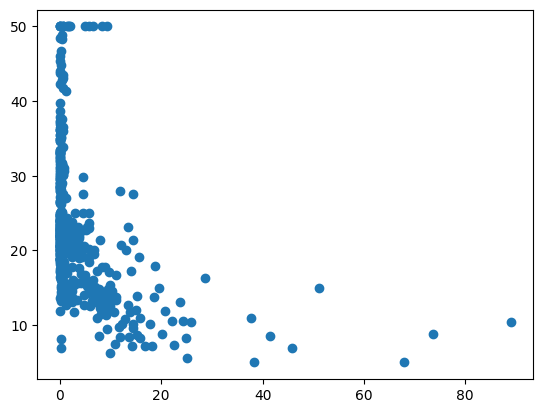

In [17]:
# Analysing correlated features

plt.scatter(df["crim"], df["medv"])

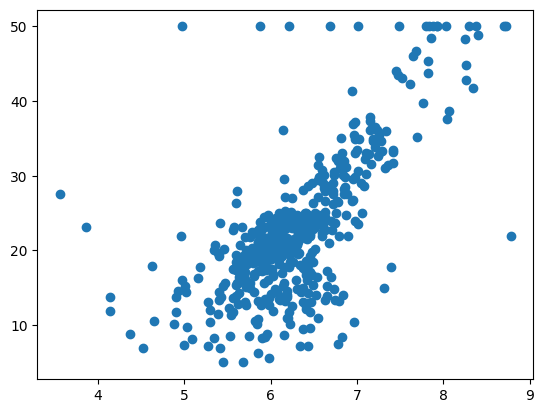

In [12]:
plt.scatter(df["rm"], df["Price"])

<Axes: xlabel='rm', ylabel='medv'>

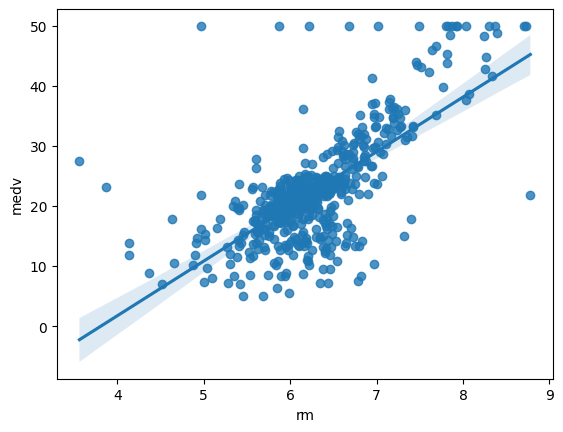

In [20]:
import seaborn as sns

sns.regplot(x="rm", y="medv", data=df)

<Axes: xlabel='lstat', ylabel='medv'>

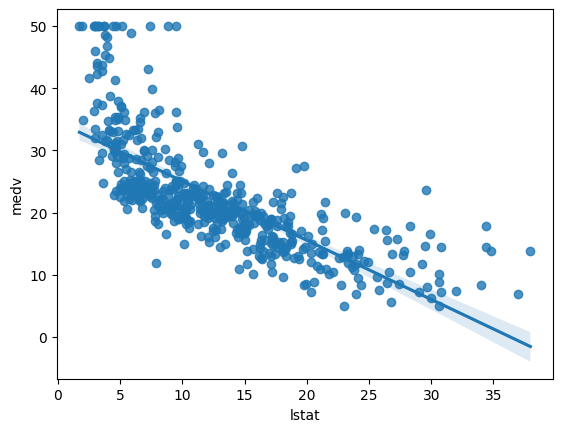

In [21]:
sns.regplot(x="lstat", y="medv", data=df)

# Negative correlated

<Axes: xlabel='chas', ylabel='medv'>

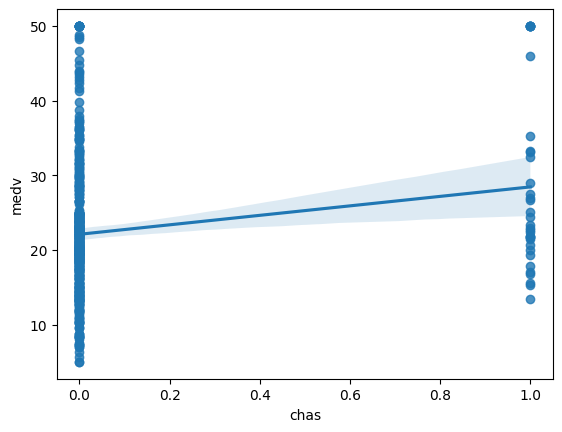

In [22]:
sns.regplot(x="chas", y="medv", data=df)

In [23]:
# Divide features to independent feature

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [24]:
# Train Test SPlit

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [55]:
import pickle

pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [28]:
# Why standard scaler: to make all our points to point to global minima usinng gradient descent we use scaler.


In [29]:
# Model Training

from sklearn.linear_model import LinearRegression

In [30]:
regression = LinearRegression()

In [31]:
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
## Print co-eff and intercept:
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [33]:
print(regression.intercept_)

23.01581920903955


In [34]:
# On which parameter model is trained:

regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [35]:
#prediction on test data:

reg_pred = regression.predict(X_test)

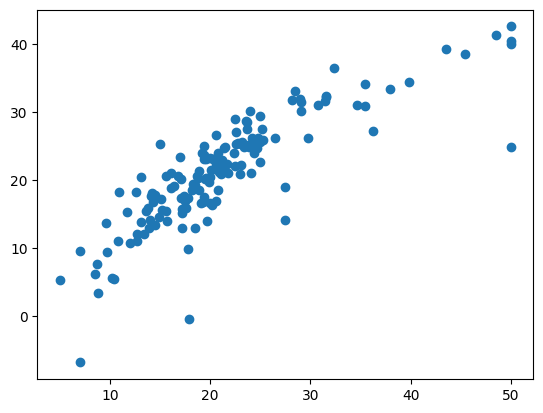

In [36]:
#plot to see predictions:

plt.scatter(y_test, reg_pred)

In [37]:
# Prediction on residuals (Error with respect to y_test):

residuals = y_test - reg_pred

In [38]:
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: medv, Length: 152, dtype: float64

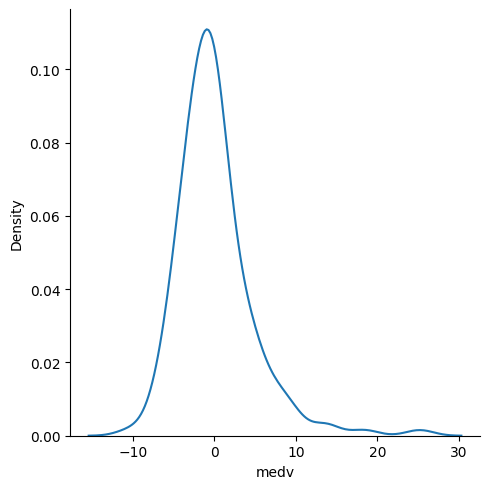

In [39]:
# Plot Residuals:

sns.displot(residuals, kind='kde')

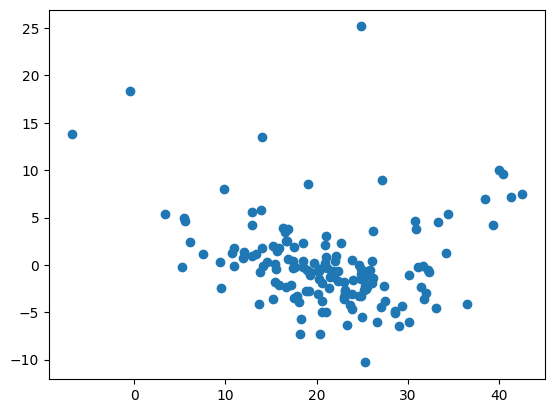

In [40]:
 #Scatter plot with respect to predictions and residuals

 plt.scatter(reg_pred, residuals)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
print(mean_absolute_error(y_test, reg_pred))

3.1627098714574053


In [43]:

print(mean_squared_error(y_test, reg_pred))

21.51744423117721


In [44]:
import numpy as np
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

4.6386899261728205


## R2 and Adjusted R2

In [45]:
# R2 and Adjysted R2

# R^2 = 1 - SSR/SST

# Adjusted R^2 = 1 - [(1-R^2)*(n-1)/(n-k-1)]

from sklearn.metrics import r2_score

score = r2_score(y_test, reg_pred)

print(score)

0.7112260057484932


In [46]:
Adjusted_r_sq = 1 - (1-score)*(len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

In [47]:
Adjusted_r_sq

0.6840226584639308

In [23]:
# Adjusted r^2 should be less than r^2

## New Data

In [48]:
X.iloc[0].to_numpy().reshape(1, -1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [49]:
scaler.transform(X.iloc[0].to_numpy().reshape(1, -1))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [50]:
regression.predict(scaler.transform(X.iloc[0].to_numpy().reshape(1, -1)))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

## Pickle Model for Deployment

In [51]:
import pickle

In [39]:
pickle.dump(regression, open('regression_model.pkl', 'wb'))

In [53]:
pickled_model = pickle.load(open('regression_model.pkl', 'rb'))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [54]:
pickled_model.predict(scaler.transform(X.iloc[0].to_numpy().reshape(1, -1)))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])